# CSCE 5320 project

In [1]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 
import numpy as np
import plotly.express as px
%matplotlib inline
netflix=pd.read_csv("netflix_titles.csv")
disney=pd.read_csv("disney_plus_titles.csv")


In [2]:
netflix['platform'] = 'netflix'
disney['platform']  = 'disney'

In [3]:
df_all = pd.concat([netflix, disney])

In [4]:
# data cleaning
df_all['duration'] = np.where(df_all['rating']=='74 min','74 min', df_all['duration'] )
df_all['duration'] = np.where(df_all['rating']=='84 min','84 min', df_all['duration'] )
df_all['duration'] = np.where(df_all['rating']=='66 min','66 min', df_all['duration'] )

df_all['rating'] = np.where(df_all['rating']=='74 min', 'Nan', df_all['rating'])
df_all['rating'] = np.where(df_all['rating']=='84 min', 'Nan', df_all['rating'])
df_all['rating'] = np.where(df_all['rating']=='66 min', 'Nan', df_all['rating'])

> #### 🗺️ contents by county

In [5]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df_all)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#008B8B"))

data = [trace1]
layout = go.Layout(title="The number of content by country", height=600, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

> #### 📽️ Netflix vs Disney+

In [6]:
fig2 = px.pie(df_all, names='platform',
              height=400, width=600,
              hole=0.7,
              title='Platform Overview',
              color_discrete_sequence=['#4c78a8', '#72b7b2'])

# Update trace settings
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)

# Update layout settings
fig2.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                   plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=17, color='#8a8d93'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()


In [7]:
df_group_yr = df_all.groupby(['platform','release_year']).count()['show_id'].reset_index()

In [8]:
fig = px.bar(df_group_yr, x='release_year', y='show_id', color='platform', template='simple_white',
             color_discrete_map={'netflix': '#E50914', 'disney': '#0047AB'})

fig.update_layout(
    title={'text': 'Number of Contents by Released Year',
           'y': 0.95,
           'x': 0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title='Year',
    yaxis_title='Number of Contents',
    legend_title='Platform Type'
)

fig.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=True,
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  title_font=dict(size=20, color='#555', family='Lato, sans-serif'),
                  font=dict(size=12, color='#8a8d93'),
                  hoverlabel=dict(bgcolor='#444', font_size=8, font_family='Lato, sans-serif'))

fig.show()


> #### 📼 genre count

In [9]:
genre_count = df_all.copy()
genre_count = pd.concat([genre_count, df_all['listed_in'].str.split(',', expand=True)])

In [10]:
genre_count = genre_count.melt(id_vars = ['type', 'title'], value_vars = range(3), value_name = 'genre')

In [11]:
genre_count = genre_count[genre_count['genre'].notna()]

In [12]:
fig = px.histogram(data_frame=genre_count, x='genre', title="Genre of the Movies")
fig.update_layout(
    plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
    title_font=dict(size=20, color='#555', family='Lato, sans-serif'),
    font=dict(size=12, color='#8a8d93'),
    hoverlabel=dict(bgcolor='#444', font_size=8, font_family='Lato, sans-serif')
)
fig.update_xaxes(tickangle=-45, tickfont=dict(size=10))

fig.show()


In [13]:
df_group_genre = df_all.groupby(['platform','listed_in']).count()['show_id'].reset_index()

In [14]:
df_group_genre[df_group_genre['platform']=='netflix'].sort_values('show_id', ascending=False)[:10].style.background_gradient()

,platform,listed_in,show_id
655,netflix,"Dramas, International Movies",362
603,netflix,Documentaries,359
799,netflix,Stand-Up Comedy,334
529,netflix,"Comedies, Dramas, International Movies",274
648,netflix,"Dramas, Independent Movies, International Movies",252
751,netflix,Kids' TV,220
450,netflix,Children & Family Movies,215
454,netflix,"Children & Family Movies, Comedies",201
610,netflix,"Documentaries, International Movies",186
658,netflix,"Dramas, International Movies, Romantic Movies",180


In [15]:
top10_netflix = df_group_genre[df_group_genre['platform']=='netflix'].sort_values('show_id', ascending=False)[:10]['listed_in'].values.tolist()

> #### disney +

In [16]:
df_group_genre[df_group_genre['platform']=='disney'].sort_values('show_id', ascending=False)[:10].style.background_gradient()

,platform,listed_in,show_id
116,disney,"Animation, Comedy, Family",124
10,disney,"Action-Adventure, Animation, Comedy",77
14,disney,"Action-Adventure, Animation, Kids",45
83,disney,"Animals & Nature, Documentary, Family",40
12,disney,"Action-Adventure, Animation, Family",40
87,disney,"Animals & Nature, Docuseries, Family",39
82,disney,"Animals & Nature, Documentary",35
130,disney,"Animation, Family, Fantasy",31
24,disney,"Action-Adventure, Comedy, Family",28
129,disney,"Animation, Family",26


In [17]:
top10_disney = df_group_genre[df_group_genre['platform']=='disney'].sort_values('show_id', ascending=False)[:10]['listed_in'].values.tolist()

In [18]:
fig2 = px.pie(df_all[(df_all['platform']=='disney')&(df_all['listed_in'].isin(top10_disney))], names='listed_in', 
             height=600, width=900, 
             hole=0.7, 
             title='Top 10 genre on Disney+',
                   color_discrete_sequence=['#4c78a8', '#72b7b2'])
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)
fig2.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                        font=dict(size=9, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig2.show()

In [19]:
df = pd.read_csv("disney_plus_titles.csv")


In [20]:
df["date_added"] = pd.to_datetime(df["date_added"])


In [21]:
df["date_added"].dtype


dtype('<M8[ns]')

In [22]:
df['season'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [23]:
df["duration"] = df["duration"].astype("int64")
df["season"] = df["season"].astype("int64")

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

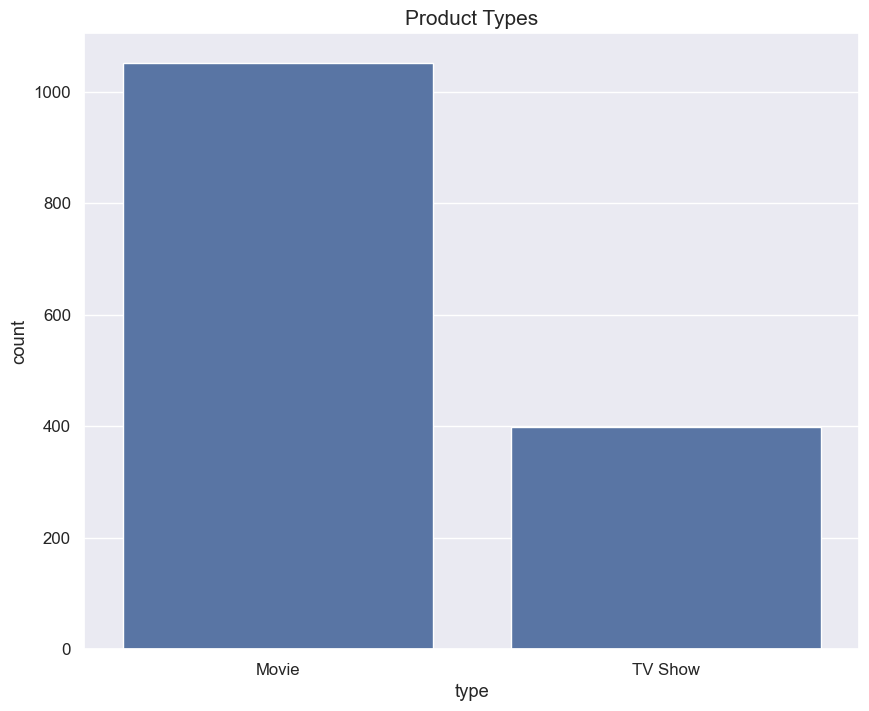

In [25]:
sns.set(font_scale=1.1)

plt.figure(figsize=(10,8))
sns.countplot(x=df["type"])
plt.title("Product Types", size=15)
plt.show()

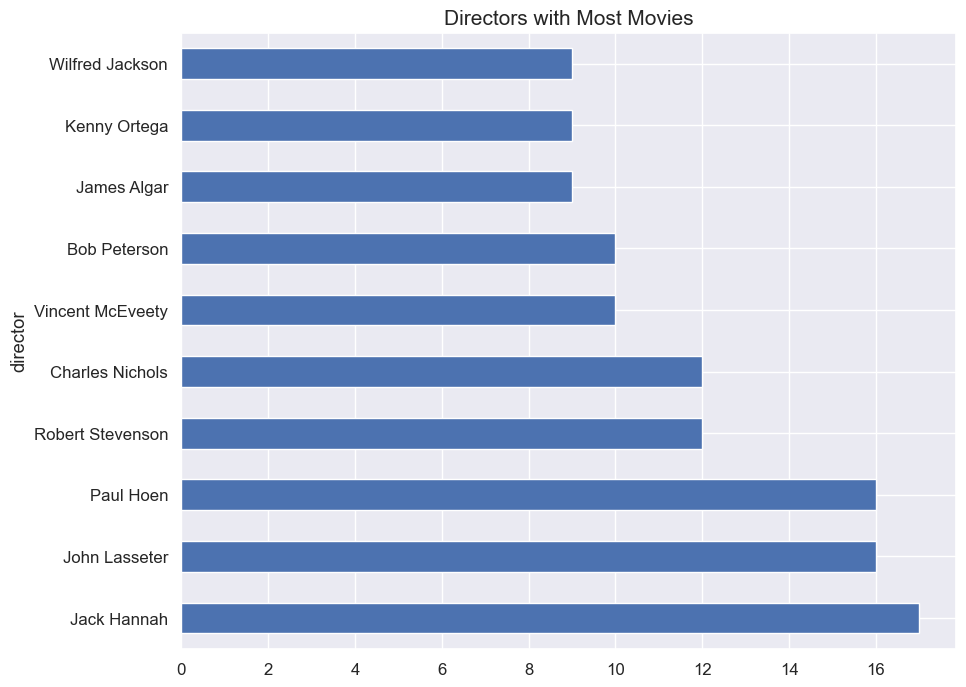

In [26]:
plt.figure(figsize=(10,8))
df["director"].value_counts().head(10).plot(kind='barh')
plt.title("Directors with Most Movies", size=15)
plt.show()

C:\Users\hadan\AppData\Local\Temp\ipykernel_14472\2513974950.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




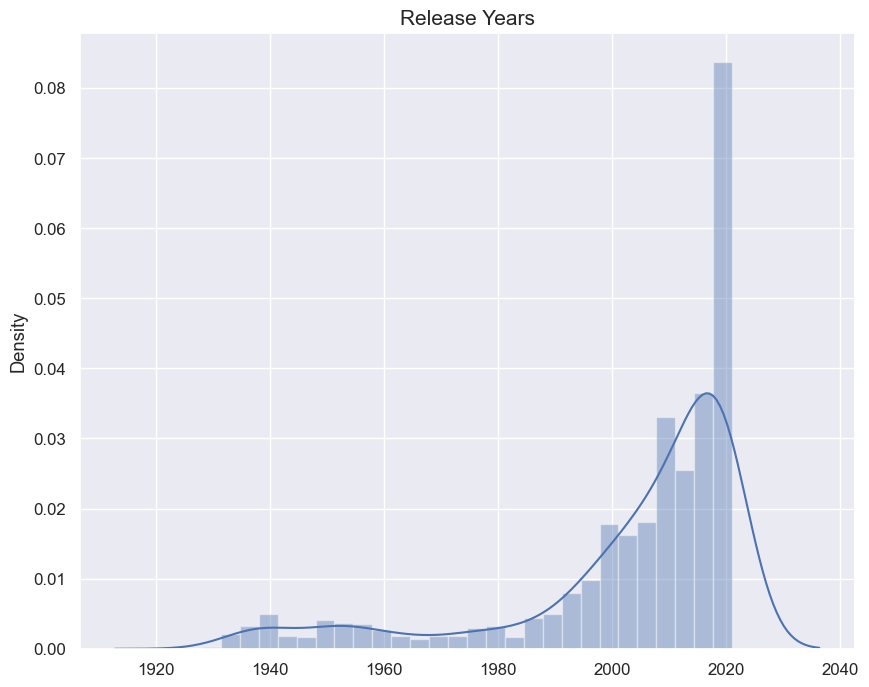

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(x=df["release_year"])
plt.title("Release Years", size=15)
plt.show()

C:\Users\hadan\AppData\Local\Temp\ipykernel_14472\740389030.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




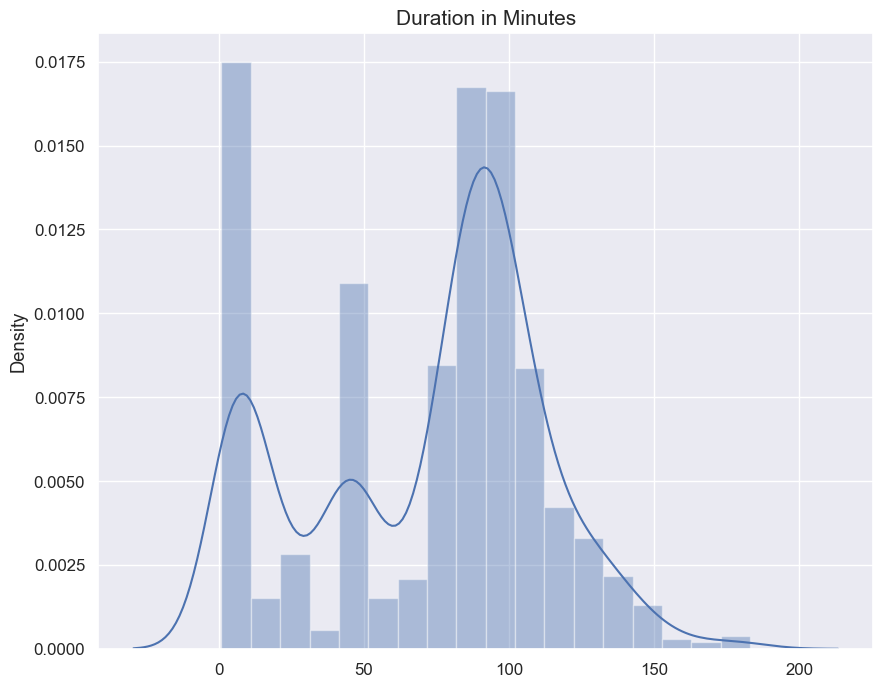

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(x=df[df["duration"]>0]["duration"])
plt.title("Duration in Minutes", size=15)
plt.show()

C:\Users\hadan\AppData\Local\Temp\ipykernel_14472\3578777533.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




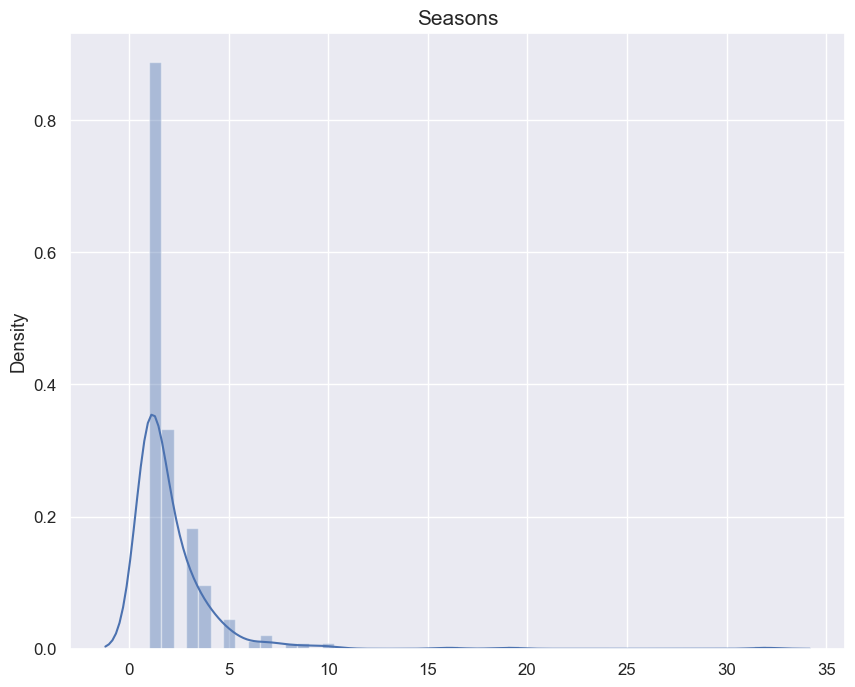

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(x=df[df["season"]>0]["season"])
plt.title("Seasons", size=15)
plt.show()